In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("andradaolteanu/gtzan-dataset-music-genre-classification")

print("Path to dataset files:", path)

100%|██████████| 1.21G/1.21G [00:17<00:00, 74.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/versions/1


In [66]:
data_path = path + "/Data"

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import librosa, librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

In [68]:
feature30 = pd.read_csv(data_path + "/features_30_sec.csv")


Shape of Features_30sec is  (1000, 60)


In [69]:
feature30.columns.tolist()

['filename',
 'length',
 'chroma_stft_mean',
 'chroma_stft_var',
 'rms_mean',
 'rms_var',
 'spectral_centroid_mean',
 'spectral_centroid_var',
 'spectral_bandwidth_mean',
 'spectral_bandwidth_var',
 'rolloff_mean',
 'rolloff_var',
 'zero_crossing_rate_mean',
 'zero_crossing_rate_var',
 'harmony_mean',
 'harmony_var',
 'perceptr_mean',
 'perceptr_var',
 'tempo',
 'mfcc1_mean',
 'mfcc1_var',
 'mfcc2_mean',
 'mfcc2_var',
 'mfcc3_mean',
 'mfcc3_var',
 'mfcc4_mean',
 'mfcc4_var',
 'mfcc5_mean',
 'mfcc5_var',
 'mfcc6_mean',
 'mfcc6_var',
 'mfcc7_mean',
 'mfcc7_var',
 'mfcc8_mean',
 'mfcc8_var',
 'mfcc9_mean',
 'mfcc9_var',
 'mfcc10_mean',
 'mfcc10_var',
 'mfcc11_mean',
 'mfcc11_var',
 'mfcc12_mean',
 'mfcc12_var',
 'mfcc13_mean',
 'mfcc13_var',
 'mfcc14_mean',
 'mfcc14_var',
 'mfcc15_mean',
 'mfcc15_var',
 'mfcc16_mean',
 'mfcc16_var',
 'mfcc17_mean',
 'mfcc17_var',
 'mfcc18_mean',
 'mfcc18_var',
 'mfcc19_mean',
 'mfcc19_var',
 'mfcc20_mean',
 'mfcc20_var',
 'label']

In [70]:
feature30 = feature30.drop(columns='length')
feature30_filenames = feature30["filename"]
feature30 = feature30.drop(columns=["filename"])
feature30.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,9.015054e+05,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,2.977893e+06,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,7.840345e+05,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,1.493194e+06,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,1.572978e+06,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [71]:
feature30.head()
feature30.shape

(1000, 58)

Performing Label Encoding

In [72]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(feature30["label"])
X = feature30.drop(columns=["label"]).values

In [73]:
label_map = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
inv_label_map = {v: k for k, v in label_map.items()}

In [74]:
inv_label_map

{np.int64(0): 'blues',
 np.int64(1): 'classical',
 np.int64(2): 'country',
 np.int64(3): 'disco',
 np.int64(4): 'hiphop',
 np.int64(5): 'jazz',
 np.int64(6): 'metal',
 np.int64(7): 'pop',
 np.int64(8): 'reggae',
 np.int64(9): 'rock'}

Missing values Handling

In [75]:
feature30.isnull().sum()

,0
chroma_stft_mean,0
chroma_stft_var,0
rms_mean,0
rms_var,0
spectral_centroid_mean,0
spectral_centroid_var,0
spectral_bandwidth_mean,0
spectral_bandwidth_var,0
rolloff_mean,0
rolloff_var,0


Performing Train test Split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [77]:
print("Shape of X_train is ", X_train.shape)
print("Shape of y_train is ", y_train.shape)
print("Shape of X_test is ", X_test.shape)
print("Shape of y_test is ", y_test.shape)

Shape of X_train is  (800, 57)
Shape of y_train is  (800,)
Shape of X_test is  (200, 57)
Shape of y_test is  (200,)


In [78]:
print("X_train is", X_train)
print("X_test is", X_test)
print("y_train is", y_train)
print("y_test is", y_test)

X_train is [[ 2.93696195e-01  8.61618593e-02  1.46971136e-01 ...  7.71162643e+01
  -5.11480522e+00  9.35421829e+01]
 [ 3.82780999e-01  8.18207934e-02  2.09497571e-01 ...  3.37479553e+01
   1.82735896e+00  4.41181068e+01]
 [ 3.74336630e-01  8.47431496e-02  1.07105821e-01 ...  3.31746941e+01
  -2.70335317e+00  3.32078323e+01]
 ...
 [ 3.90347421e-01  8.51396695e-02  9.65365618e-02 ...  3.33640099e+01
  -1.17349184e+00  3.47640762e+01]
 [ 4.73975331e-01  7.75349811e-02  1.91986457e-01 ...  5.26532173e+01
   2.31176719e-01  4.36805267e+01]
 [ 3.65328461e-01  8.63151476e-02  1.44382030e-01 ...  3.61983109e+01
  -5.91581249e+00  4.35436554e+01]]
X_test is [[ 2.08079696e-01  8.26177597e-02  5.16805202e-02 ...  8.83574524e+01
   3.54028368e+00  1.65091721e+02]
 [ 3.90913635e-01  1.00480244e-01  6.30842298e-02 ...  4.53934135e+01
  -3.43142462e+00  3.25176277e+01]
 [ 4.14736241e-01  8.96623135e-02  4.88493033e-02 ...  7.07131577e+01
   6.60749435e-01  5.14312210e+01]
 ...
 [ 2.61474460e-01  8.51

Scaling The Xtrain and Xtest

In [79]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Training On ML Models

In [93]:
models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "MLPClassifier": MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=500, random_state=42)
}


In [94]:
# Dict to store all results
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'y_pred': [],  # optional, for confusion matrix
}

In [95]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Store metrics (macro average for multiclass)
    results['Model'].append(name)
    results['Accuracy'].append(accuracy_score(y_test, y_pred))
    results['Precision'].append(precision_score(y_test, y_pred, average='macro'))
    results['Recall'].append(recall_score(y_test, y_pred, average='macro'))
    results['F1-Score'].append(f1_score(y_test, y_pred, average='macro'))
    results['y_pred'].append(accuracy_score(y_test,y_pred))  # Save preds for later CM plotting

    print(f"\n{name} Done.")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    # print("Classification Report:\n", classification_report(y_test, y_pred))


RandomForest Done.
Accuracy: 0.685

XGBoost Done.
Accuracy: 0.735

SVM Done.
Accuracy: 0.735

LogisticRegression Done.
Accuracy: 0.71

MLPClassifier Done.
Accuracy: 0.745


In [96]:
results_df = pd.DataFrame(results)

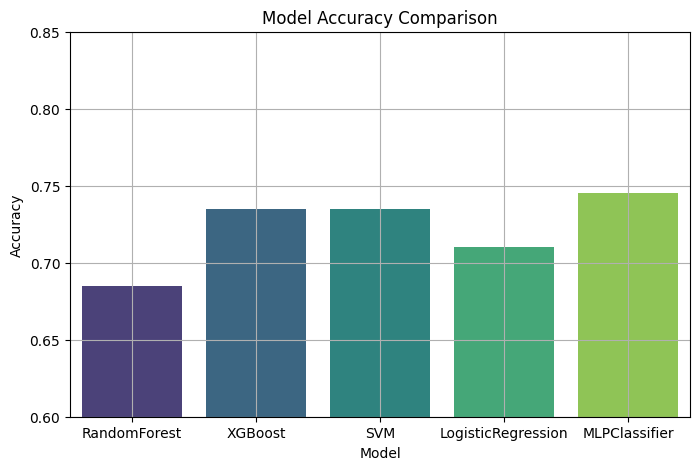

In [98]:
# Accuracy Bar Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')
plt.title("Model Accuracy Comparison")
plt.ylim(0.6, 0.85)
plt.grid(True)
plt.show()

- MLPClassifier achieves the highest accuracy (~0.745), indicating it performs best at classifying the data correctly.

- XGBoost and SVM perform almost equally well, both showing good generalization with accuracies around 0.735.

- Logistic Regression is slightly behind, with accuracy around 0.715, still reasonable.

- RandomForest shows the lowest accuracy (~0.685) among all models, suggesting it may not be the best fit for this dataset or might need hyperparameter tuning.

Insight:
*MLPClassifier is the most accurate model overall, while RandomForest underperforms compared to the others.*

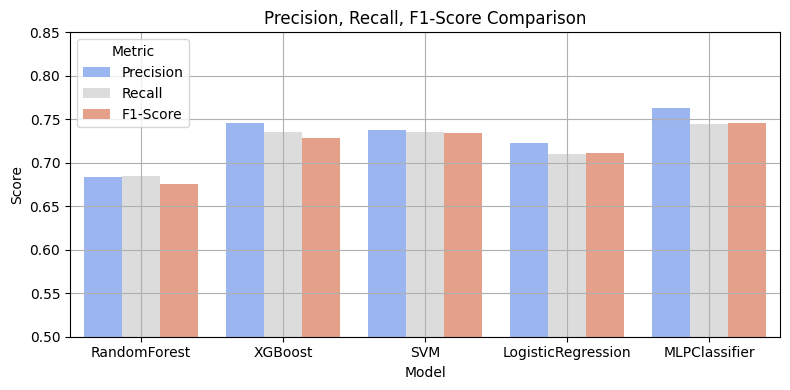

In [107]:
melted = results_df.melt(id_vars="Model", value_vars=["Precision", "Recall", "F1-Score"], var_name="Metric")
plt.figure(figsize=(8, 4))
sns.barplot(x="Model", y="value", hue="Metric", data=melted, palette="coolwarm")
plt.title("Precision, Recall, F1-Score Comparison")
plt.ylim(0.5, 0.85)
plt.ylabel("Score")
plt.grid(True)
plt.tight_layout()
plt.show()

- MLPClassifier leads across all metrics: Precision (~ 0.765), Recall (~ 0.745), and F1-Score (~0.745) — making it the most balanced and reliable model.

- SVM and XGBoost follow closely with stable and balanced scores, indicating robust performance.

- Logistic Regression has slightly lower metrics across the board.

- RandomForest shows the weakest performance with the lowest precision, recall, and F1-Score, suggesting it's misclassifying more frequently.

Insight:
*MLPClassifier not only delivers the best accuracy but also maintains strong balance in precision, recall, and F1-score, making it the most dependable choice.*

